<a href="https://colab.research.google.com/github/swarup1606/DATA_SCIENCE_INTERNSHIP/blob/main/Wine_quality_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Dependencies


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

# loading the dataset to a Pandas DataFrame
wine_dataset = pd.read_csv('/content/winequalityN.csv')

# number of rows & columns in the dataset
wine_dataset.shape

(6497, 13)

In [ ]:
# first 5 rows of the dataset
wine_dataset.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,white,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,white,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,white,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [ ]:
# checking for missing values
wine_dataset.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

Data Analysis and Visulaization

In [ ]:
# statistical measures of the dataset
wine_dataset.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,6487.000000,6489.000000,6494.000000,6495.000000,6495.000000,6497.000000,6497.000000,6497.000000,6488.000000,6493.000000,6497.000000,6497.000000
mean,7.216579,0.339691,0.318722,5.444326,0.056042,30.525319,115.744574,0.994697,3.218395,0.531215,10.491801,5.818378
std,1.296750,0.164649,0.145265,4.758125,0.035036,17.749400,56.521855,0.002999,0.160748,0.148814,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


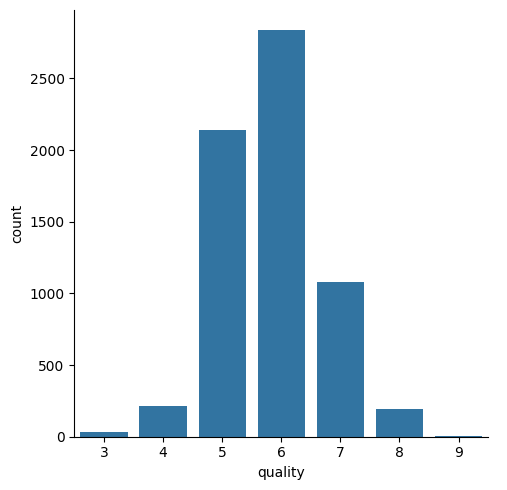

In [ ]:
# number of values for each quality
sns.catplot(x='quality', data = wine_dataset, kind = 'count')
plt.show()

<Axes: xlabel='quality', ylabel='volatile acidity'>

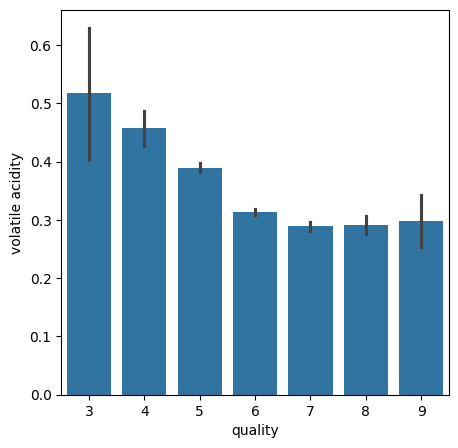

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'volatile acidity', data = wine_dataset)

<Axes: xlabel='quality', ylabel='citric acid'>

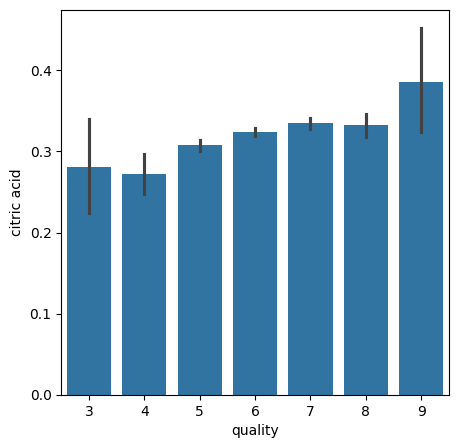

In [ ]:
# volatile acidity vs Quality
plot = plt.figure(figsize=(5,5))
sns.barplot(x='quality', y = 'citric acid', data = wine_dataset)

Data Preprocessing

In [ ]:
# separate the data and Label
X = wine_dataset.drop('quality',axis=1)
print(X)

       type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0     white            7.0             0.270         0.36            20.7   
1     white            6.3             0.300         0.34             1.6   
2     white            8.1             0.280         0.40             6.9   
3     white            7.2             0.230         0.32             8.5   
4     white            7.2             0.230         0.32             8.5   
...     ...            ...               ...          ...             ...   
6492    red            6.2             0.600         0.08             2.0   
6493    red            5.9             0.550         0.10             2.2   
6494    red            6.3             0.510         0.13             2.3   
6495    red            5.9             0.645         0.12             2.0   
6496    red            6.0             0.310         0.47             3.6   

      chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  

Label Binarizaton

In [ ]:
Y = wine_dataset['quality'].apply(lambda y_value: 1 if y_value>=7 else 0)
print(Y)

0       0
1       0
2       0
3       0
4       0
       ..
6492    0
6493    0
6494    0
6495    0
6496    0
Name: quality, Length: 6497, dtype: int64


Train and Test Split

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)
print(Y.shape, Y_train.shape, Y_test.shape)
print(X.shape, X_train.shape, X_test.shape)

(6497,) (5197,) (1300,)
(6497, 12) (5197, 12) (1300, 12)


In [ ]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Load the wine quality dataset
wine_dataset = pd.read_csv('/content/winequalityN.csv')

# Select relevant columns
relevant_columns = [
    'fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
    'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
    'pH', 'sulphates', 'alcohol', 'quality'
]

# Subset the dataset with relevant columns
wine_data = wine_dataset[relevant_columns]

# Handle missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(wine_data.drop('quality', axis=1))  # Impute missing values, excluding 'quality'

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Perform PCA for dimensionality reduction
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_pca, wine_data['quality'], test_size=0.3, random_state=0)

# Initialize and train logistic regression model
logr = LogisticRegression(max_iter=1000)
logr.fit(X_train, y_train)

# Predict on test data
y_pred = logr.predict(X_test)

# Print evaluation metrics
print('Logistic Regression Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Logistic Regression Accuracy: 0.46205128205128204
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.00      0.00      0.00        65
           5       0.50      0.32      0.39       663
           6       0.45      0.81      0.58       839
           7       0.31      0.03      0.06       318
           8       0.00      0.00      0.00        58

    accuracy                           0.46      1950
   macro avg       0.21      0.19      0.17      1950
weighted avg       0.42      0.46      0.39      1950

Confusion Matrix:
 [[  0   0   2   5   0   0]
 [  0   0  12  52   1   0]
 [  0   0 213 447   3   0]
 [  0   0 148 678  13   0]
 [  0   0  42 266  10   0]
 [  0   0   9  44   5   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:


# Separate features (X) and target (y)
X = wine_data.drop('quality', axis=1)  # Features
y = wine_data['quality']  # Target variable

# Handle missing values
imputer = SimpleImputer(strategy='median')  # Use median imputation for missing values
X = imputer.fit_transform(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Initialize and train Naive Bayes classifier
nb = GaussianNB()
nb.fit(X_train, y_train)

# Predict on test data
y_pred = nb.predict(X_test)

# Print evaluation metrics
print('Naive Bayes Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))


Naive Bayes Accuracy: 0.4605128205128205
Classification Report:
               precision    recall  f1-score   support

           3       0.29      0.29      0.29         7
           4       0.14      0.14      0.14        65
           5       0.57      0.54      0.55       663
           6       0.48      0.44      0.46       839
           7       0.35      0.51      0.41       318
           8       0.17      0.05      0.08        58
           9       0.00      0.00      0.00         0

    accuracy                           0.46      1950
   macro avg       0.28      0.28      0.28      1950
weighted avg       0.47      0.46      0.46      1950

Confusion Matrix:
 [[  2   2   2   1   0   0   0]
 [  0   9  23  23   9   1   0]
 [  3  26 356 236  42   0   0]
 [  1  23 215 366 222   7   5]
 [  1   3  26 117 162   7   2]
 [  0   0   7  19  29   3   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
#KNN
from sklearn.neighbors import KNeighborsClassifier

# Continue with the same dataframe `df` loaded previously

# No need to handle outliers and imbalance again
# PCA reduction is also not necessary for KNN

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Initialize and train KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Predict on test data
y_pred = knn.predict(X_test)

# Print evaluation metrics
print('3.KNN Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

3.KNN Accuracy: 0.4564102564102564
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.24      0.14      0.17        65
           5       0.47      0.51      0.49       663
           6       0.48      0.55      0.51       839
           7       0.36      0.22      0.27       318
           8       0.53      0.14      0.22        58

    accuracy                           0.46      1950
   macro avg       0.34      0.26      0.28      1950
weighted avg       0.45      0.46      0.44      1950

Confusion Matrix:
 [[  0   1   5   1   0   0]
 [  0   9  36  13   7   0]
 [  0  11 340 286  25   1]
 [  0  14 276 464  81   4]
 [  0   3  64 180  69   2]
 [  0   0   8  30  12   8]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Initialize and train Decision Tree classifier
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

# Predict on test data
y_pred = dt.predict(X_test)

# Print evaluation metrics
print('4.Decision Tree Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

4.Decision Tree Accuracy: 0.5964102564102564
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.16      0.12      0.14        65
           5       0.64      0.62      0.63       663
           6       0.62      0.65      0.63       839
           7       0.54      0.56      0.55       318
           8       0.41      0.47      0.44        58

    accuracy                           0.60      1950
   macro avg       0.40      0.40      0.40      1950
weighted avg       0.59      0.60      0.59      1950

Confusion Matrix:
 [[  0   1   4   1   1   0]
 [  1   8  26  24   5   1]
 [  2  21 408 192  33   7]
 [  1  18 162 542  98  18]
 [  0   1  30  96 178  13]
 [  0   0   4  14  13  27]]


In [ ]:

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Initialize and train Random Forest classifier
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Predict on test data
y_pred = rf.predict(X_test)

# Print evaluation metrics
print('5.Random Forest Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

5.Random Forest Accuracy: 0.6758974358974359
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.75      0.09      0.16        65
           5       0.73      0.70      0.71       663
           6       0.63      0.78      0.70       839
           7       0.70      0.54      0.61       318
           8       0.80      0.41      0.55        58

    accuracy                           0.68      1950
   macro avg       0.60      0.42      0.46      1950
weighted avg       0.68      0.68      0.66      1950

Confusion Matrix:
 [[  0   1   4   2   0   0]
 [  0   6  31  26   2   0]
 [  0   1 464 193   5   0]
 [  0   0 130 652  56   1]
 [  0   0   8 133 172   5]
 [  0   0   0  22  12  24]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

# Initialize and train Gradient Boosting classifier
gbm = GradientBoostingClassifier(n_estimators=10)
gbm.fit(X_train, y_train)

# Predict on test data
y_pred = gbm.predict(X_test)

# Print evaluation metrics
print('6.Gradient Boosting Accuracy:', accuracy_score(y_test, y_pred))
print('Classification Report:\n', classification_report(y_test, y_pred))
print('Confusion Matrix:\n', confusion_matrix(y_test, y_pred))

6.Gradient Boosting Accuracy: 0.5553846153846154
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         7
           4       0.33      0.02      0.03        65
           5       0.66      0.60      0.63       663
           6       0.51      0.77      0.62       839
           7       0.53      0.13      0.20       318
           8       0.00      0.00      0.00        58
           9       0.00      0.00      0.00         0

    accuracy                           0.56      1950
   macro avg       0.29      0.22      0.21      1950
weighted avg       0.54      0.56      0.51      1950

Confusion Matrix:
 [[  0   0   4   2   0   1   0]
 [  0   1  25  39   0   0   0]
 [  4   2 395 258   2   0   2]
 [  0   0 167 647  25   0   0]
 [  1   0   9 267  40   0   1]
 [  0   0   0  49   9   0   0]
 [  0   0   0   0   0   0   0]]


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
